In [1]:
import os
import struct
import numpy as np
import matplotlib.pyplot 

"""
Loosely inspired by http://abel.ee.ucla.edu/cvxopt/_downloads/mnist.py
which is GPL licensed.
"""

def read(dataset = "training", path = "."):
    """
    Python function for importing the MNIST data set.  It returns an iterator
    of 2-tuples with the first element being the label and the second element
    being a numpy.uint8 2D array of pixel data for the given image.
    """

    if dataset is "training":
        fname_img = os.path.join(path, 'train-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels-idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels-idx1-ubyte')
    else:
        raise ValueError, "dataset must be 'testing' or 'training'"

    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)

    get_img = lambda idx: (lbl[idx], img[idx])

    # Create an iterator which returns each image in turn
    for i in xrange(len(lbl)):
        yield get_img(i)

def show(image):
    """
    Render a given numpy.uint8 2D array of pixel data.
    """
    from matplotlib import pyplot
    import matplotlib as mpl
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    pyplot.show()

60000
8
(28, 28)


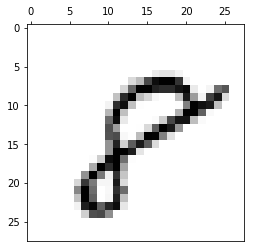

In [2]:
training_data=list(read(dataset='training', path='/home/lopezrin/Desktop/MNIST/data/'))
print(len(training_data))
label, pixels = training_data[59999]
print(label)
print(pixels.shape)
show(pixels)

3
(28, 28)


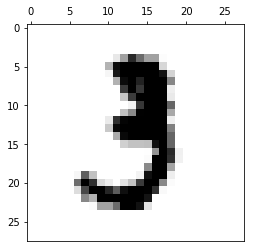

In [3]:
label, pixels = training_data[10]
print(label)
print(pixels.shape)
show(pixels)

10000
0
(28, 28)


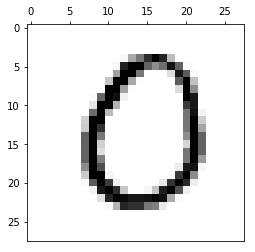

In [4]:
testing_data=list(read(dataset='testing', path='/home/lopezrin/Desktop/MNIST/data/'))
print(len(testing_data))
label, pixels = testing_data[750]
print(label)
print(pixels.shape)
show(pixels)

In [5]:
from __future__ import print_function
import numpy as np
import os
import sys
import tarfile
import math
import random
import sys

f = open('./index/'+'0train_index'+'.txt', 'w')
for k in range (0000,50000):
    f.write(str(k)+'\n')
f.close()

In [6]:
from funcCNN import *
def crossValB_10_Generic(indexVar,labelSize,vectorSize,examples,maxVal,minVal, inputChannels):
	size0=inputChannels

	data=[]
	labels=[]
	
	#load training data
	training_data=list(read(dataset='training', path='/home/lopezrin/Desktop/MNIST/data/'))
	print(len(training_data))
	#label, pixels = training_data[59999]
	#print(label)
	#print(pixels.shape)
	#show(pixels)
	
	for i in range (0,60000):
		label, pixels = training_data[i]
		data.append(pixels)
		labels.append(label)

	

	#load testing data
	testing_data=list(read(dataset='testing', path='/home/lopezrin/Desktop/MNIST/data/'))
	print(len(testing_data))
	
	for i in range (0,10000):
		label, pixels = testing_data[i]
		data.append(pixels)
		labels.append(label)
	data=np.array(data)
	print('data set', data.shape)
	#8
	show(data[59999])
	#3
   	show(data[10])
	#0
   	show(data[60750])
    

	testIndex=openVector('/home/lopezrin/Desktop/MNIST/index/'+str(indexVar)+'test_index.txt')
	valIndex=openVector('/home/lopezrin/Desktop/MNIST/index/'+str(indexVar)+'val_index.txt')
	trainIndex=openVector('/home/lopezrin/Desktop/MNIST/index/'+str(indexVar)+'train_index.txt')
	
	testIndex=testIndex.astype(int)
	valIndex=valIndex.astype(int)
	trainIndex=trainIndex.astype(int)
		
	train=[]
	test=[]
	valid=[]
	
	
	trainLabels=[]
	testLabels=[]
	validLabels=[]
	#test***************************************************************************
	for i in range (0,len(testIndex)):
		testLabels.append(labels[testIndex[i]])
		temp=[]
		for j in range (0,len(data[0])):
			for k in range (0,len(data[0][0])):
				if(data[testIndex[i]][j][k]>maxVal):
					temp.append(maxVal)
				elif(data[testIndex[i]][j][k]<minVal):
					temp.append(minVal)
				else:
					temp.append((data[testIndex[i]][j][k]-minVal)/(maxVal-minVal))
		test.append(temp)
	#valid***************************************************************************
	for i in range (0,len(valIndex)):
		validLabels.append(labels[valIndex[i]])
		temp=[]
		for j in range (0,len(data[0])):

			for k in range (0,len(data[0][0])):
				if(data[valIndex[i]][j][k]>maxVal):
					temp.append(maxVal)
				elif(data[valIndex[i]][j][k]<minVal):
					temp.append(minVal)
				else:
					temp.append((data[valIndex[i]][j][k]-minVal)/(maxVal-minVal))
		valid.append(temp)
	#train***************************************************************************
	for i in range (0,len(trainIndex)):
		trainLabels.append(labels[trainIndex[i]])
		temp=[]
		for j in range (0,len(data[0])):

			for k in range (0,len(data[0][0])):
				
				if(data[trainIndex[i]][j][k]>maxVal):
					temp.append(maxVal)
				elif(data[trainIndex[i]][j][k]<minVal):
					temp.append(minVal)
				else:
					temp.append((data[trainIndex[i]][j][k]-minVal)/(maxVal-minVal))
		train.append(temp)
	
	test=np.array(test)
	testLabels=np.array(testLabels)

	valid=np.array(valid)
	validLabels=np.array(validLabels)
	
	train=np.array(train)
	trainLabels=np.array(trainLabels)
	
	print(train.shape)
	print(trainLabels.shape)
	print(valid.shape)
	print(validLabels.shape)
	print(test.shape)
	print(testLabels.shape)


	oneHot_train_labels=oneHot(trainLabels,labelSize)
	print(oneHot_train_labels.shape)

	#train_dataset_Flat=compressArray(train,vectorSize)
	#print(train_dataset_Flat.shape)

	oneHot_valid_labels=oneHot(validLabels,labelSize)
	print(oneHot_valid_labels.shape)

	#valid_dataset_Flat=compressArray(valid,vectorSize)
	#print(valid_dataset_Flat.shape)

	oneHot_test_labels=oneHot(testLabels,labelSize)
	print(oneHot_test_labels.shape)

	#test_dataset_Flat=compressArray(test,vectorSize)
	#print(test_dataset_Flat.shape)

	return(test,oneHot_test_labels,valid,oneHot_valid_labels,train,oneHot_train_labels)

60000
10000
data set (70000, 28, 28)


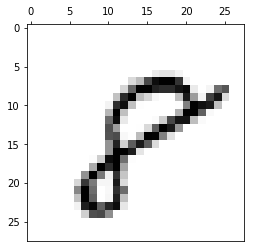

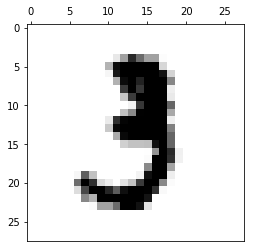

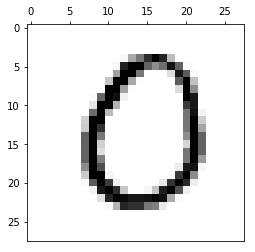

(10000,)
(10000,)
(50000,)


In [ ]:
crossValB_10_Generic(0,0,0,0,255,0, 1)
